In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data1 = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Garcia/ErrTab1(6-6, -5).dat")
dataInf = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Garcia/ErrTabInf(6-6, -5).dat")
Nvals = [2**10, 2**11, 2**12, 2**13, 2**14, 2**15]
NxVals = 50*np.array([1, 2, 4, 8, 16, 32])
table = pd.DataFrame(data1, columns = Nvals, index = NxVals)
print("**************************** S = 1.0 ****************************")
print(table)
table = pd.DataFrame(dataInf, columns = Nvals, index = NxVals)
print("**************************** S = Inf ****************************")
print(table)

**************************** S = 1.0 ****************************
         1024      2048      4096      8192      16384     32768
50    0.131716  0.134158  0.134964  0.135141  0.135038  0.135098
100   0.060963  0.063475  0.064455  0.064697  0.064641  0.064680
200   0.037722  0.031139  0.031031  0.031538  0.031452  0.031526
400   0.026321  0.014393  0.015062  0.015465  0.015468  0.015543
800   0.023949  0.009405  0.007073  0.007809  0.007627  0.007688
1600  0.041628  0.009402  0.004547  0.006996  0.003747  0.003797
**************************** S = Inf ****************************
         1024      2048      4096      8192      16384     32768
50    0.036377  0.023075  0.008534  0.009926  0.010153  0.010808
100   0.031602  0.014452  0.005456  0.004231  0.004428  0.005182
200   0.035736  0.013830  0.005147  0.002986  0.001972  0.002247
400   0.042218  0.015981  0.006291  0.003732  0.001380  0.000912
800   0.141073  0.016230  0.010485  0.004521  0.001451  0.000635
1600  0.076441  0.06346

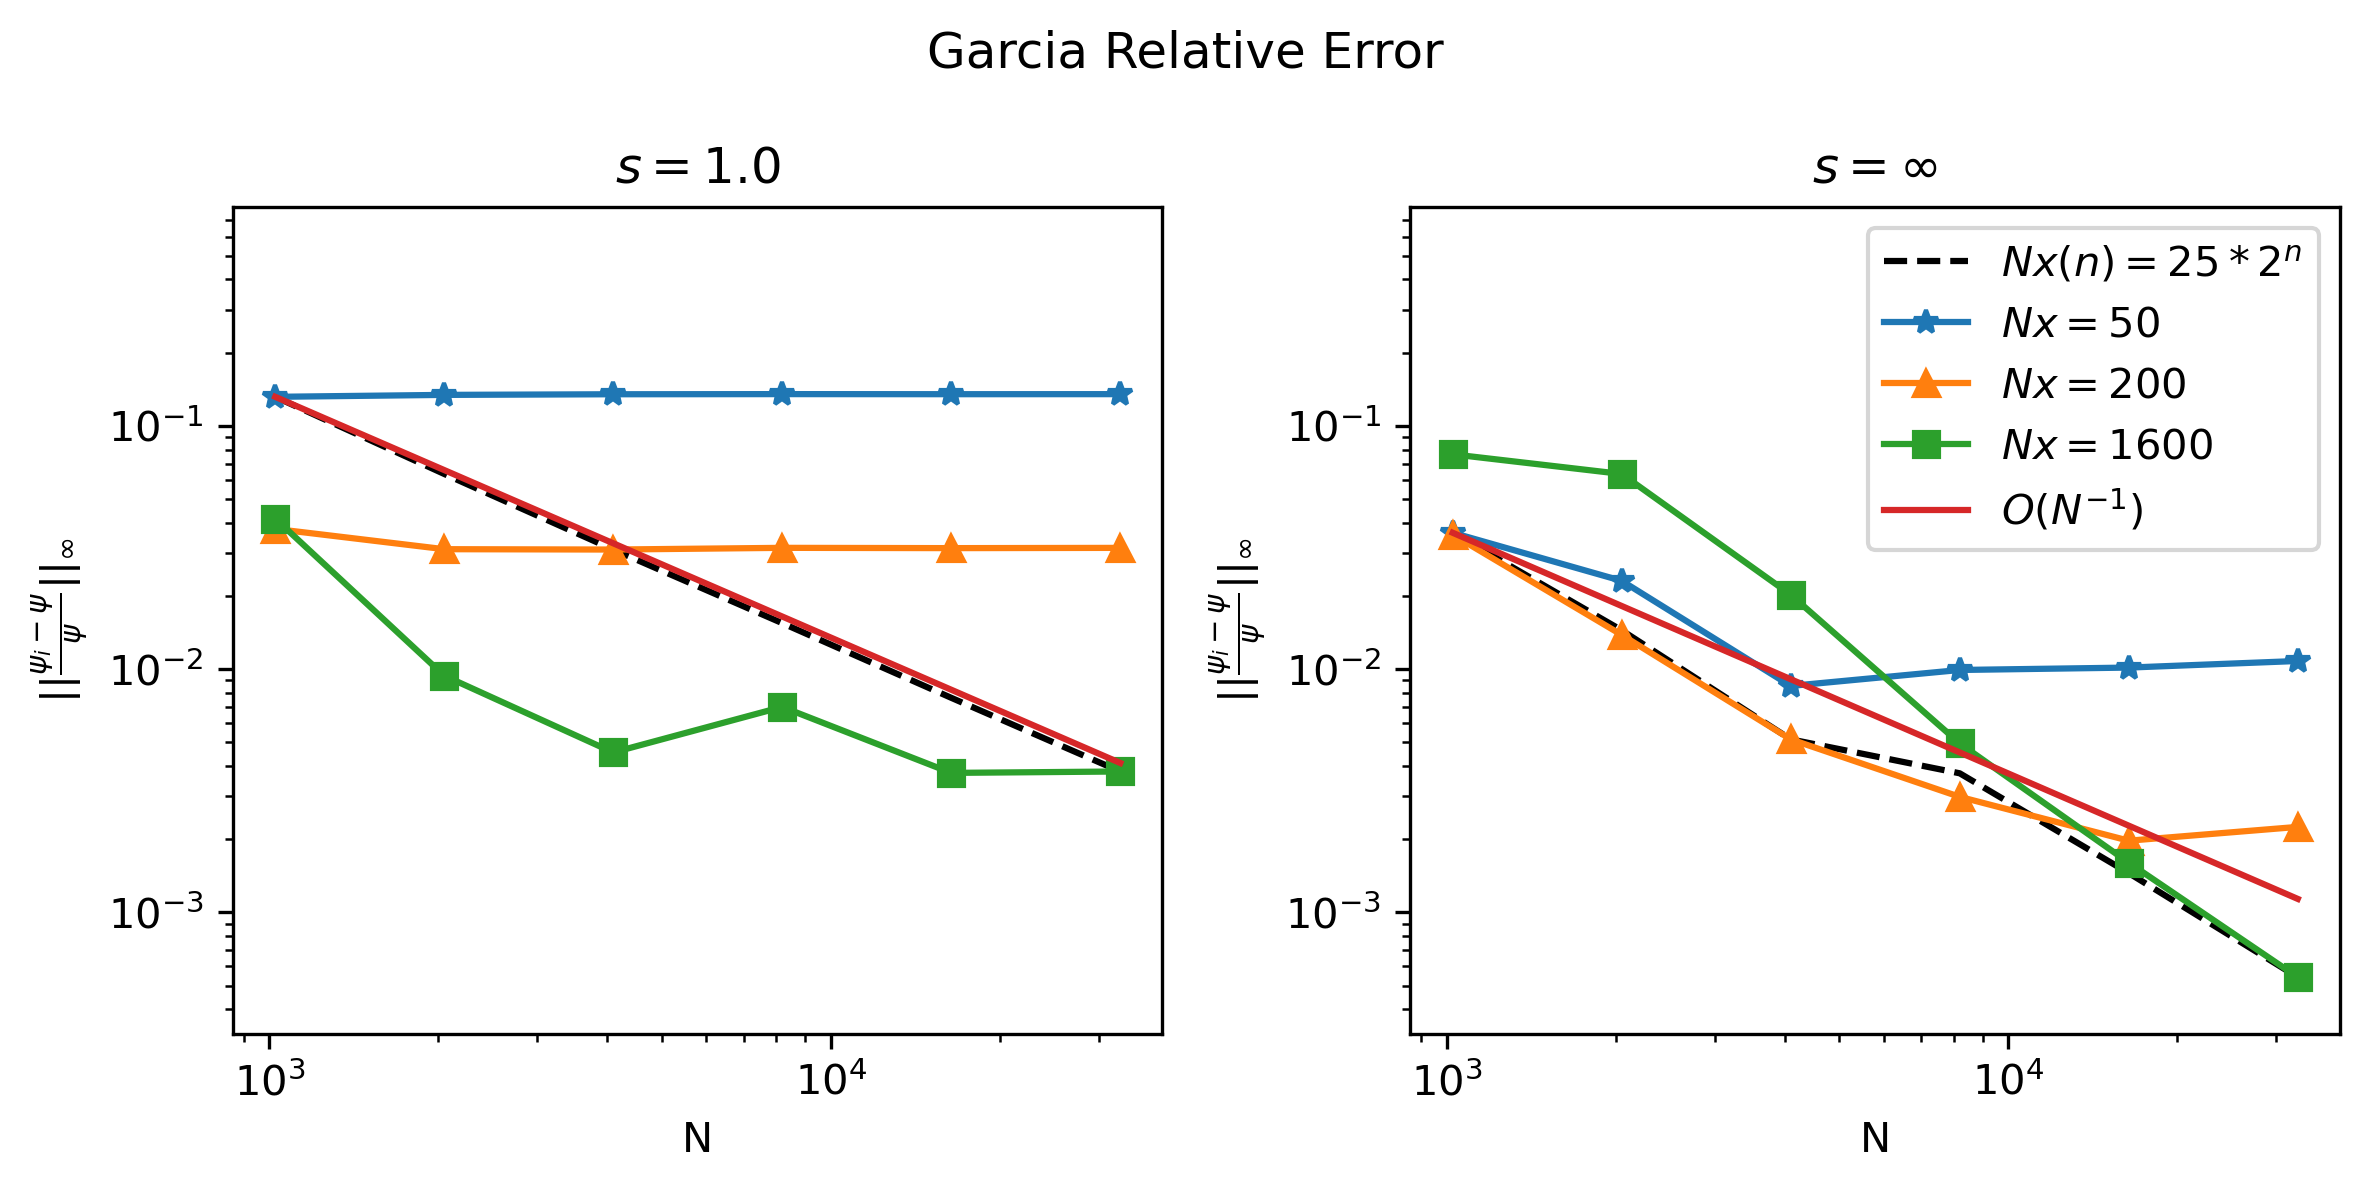

In [5]:
plt.figure(dpi=300, figsize=(8,4))
plt.suptitle("Garcia Relative Error")

ylim = [10**(-3.5), 10**(-0.1)]
ylabel = r'$||\frac{\psi_i - \psi}{\psi}||_\infty$'

data = data1
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.subplot(121)
plt.title(r"$s=1.0$")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label='Diagonal')
plt.plot(Nvals, Nx50, '*-',label='Nx = 50')
plt.plot(Nvals, Nx200, '^-',label='Nx = 200')
plt.plot(Nvals, Nx1600, 's-',label='Nx = 1600')
plt.plot(Nvals, O,label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)
#plt.legend()

#########################################################
#########################################################

data = dataInf
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.subplot(122)
plt.title(r"$s=\infty$")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label=r'$Nx(n)=25*2^{n}$')
plt.plot(Nvals, Nx50, '*-',label=r'$Nx=50$')
plt.plot(Nvals, Nx200, '^-',label=r'$Nx=200$')
plt.plot(Nvals, Nx1600, 's-',label=r'$Nx=1600$')
plt.plot(Nvals, O,label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)
#plt.xticks(Nvals, Nvals)
plt.legend()
#plt.legend(loc=(1.04,0.64))
plt.tight_layout()


In [9]:
data = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/MultiGroup/ErrTab(6-6, -5).dat")
table = pd.DataFrame(data, columns = Nvals, index = NxVals)
print("**************************** MultiGroup ****************************")
print(table)

**************************** MultiGroup ****************************
          1024      2048      4096      8192      16384     32768
50     0.074472  0.056613  0.028927  0.020458  0.004391  0.001776
100    0.147123  0.111852  0.055687  0.042075  0.006965  0.004414
200    0.286663  0.138702  0.087745  0.057144  0.015567  0.008651
400    0.591653  0.236821  0.150866  0.090128  0.028441  0.013228
800    2.295230  0.559149  0.259410  0.138284  0.050785  0.029494
1600  78.628626  2.289950  0.596488  0.248526  0.107215  0.049814


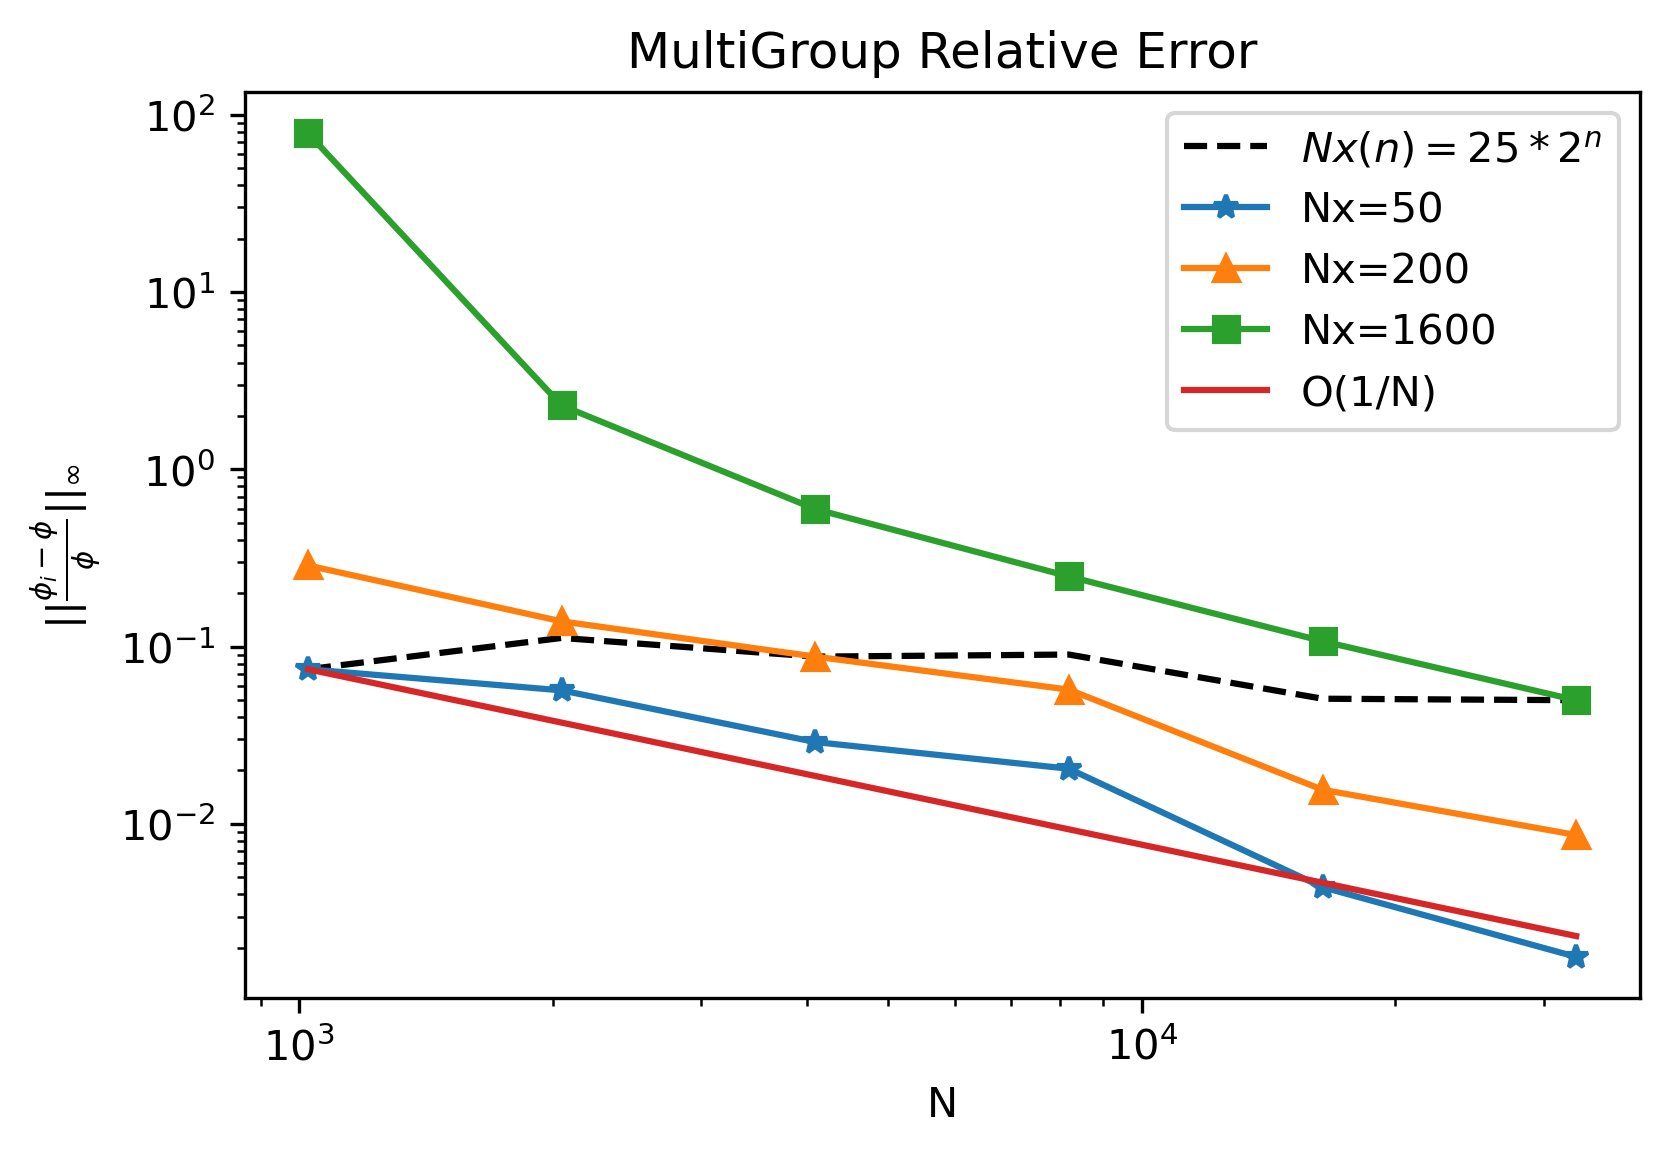

In [10]:
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.figure(dpi=300)
ylabel = r'$||\frac{\phi_i - \phi}{\phi}||_\infty$'


plt.title("MultiGroup Relative Error")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label=r'$Nx(n)=25*2^{n}$')
plt.plot(Nvals, Nx50, '*-',label=r'Nx=50')
plt.plot(Nvals, Nx200, '^-',label=r'Nx=200')
plt.plot(Nvals, Nx1600, 's-',label=r'Nx=1600')
plt.plot(Nvals, O, label = 'O(1/N)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [11]:
data = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Reeds/ErrTab(6-6, -5).dat")
NxVals = 80*np.array([1, 2, 4, 8, 16, 32])
table = pd.DataFrame(data, columns = Nvals, index = NxVals)
print("**************************** Reeds ****************************")
print(table)

**************************** Reeds ****************************
          1024       2048      4096      8192      16384     32768
80     5.335606   2.839854  1.666610  1.168827  0.843155  0.667932
160    5.969501   3.018006  1.660347  1.049151  0.692700  0.495290
320    7.007420   3.481741  1.861806  1.110336  0.704829  0.473938
640    7.827672   3.867364  2.043634  1.185992  0.741974  0.485338
1280   9.558791   4.111193  2.161109  1.238219  0.770290  0.497903
2560  15.242654  14.625831  2.227518  1.268434  0.787212  0.506135


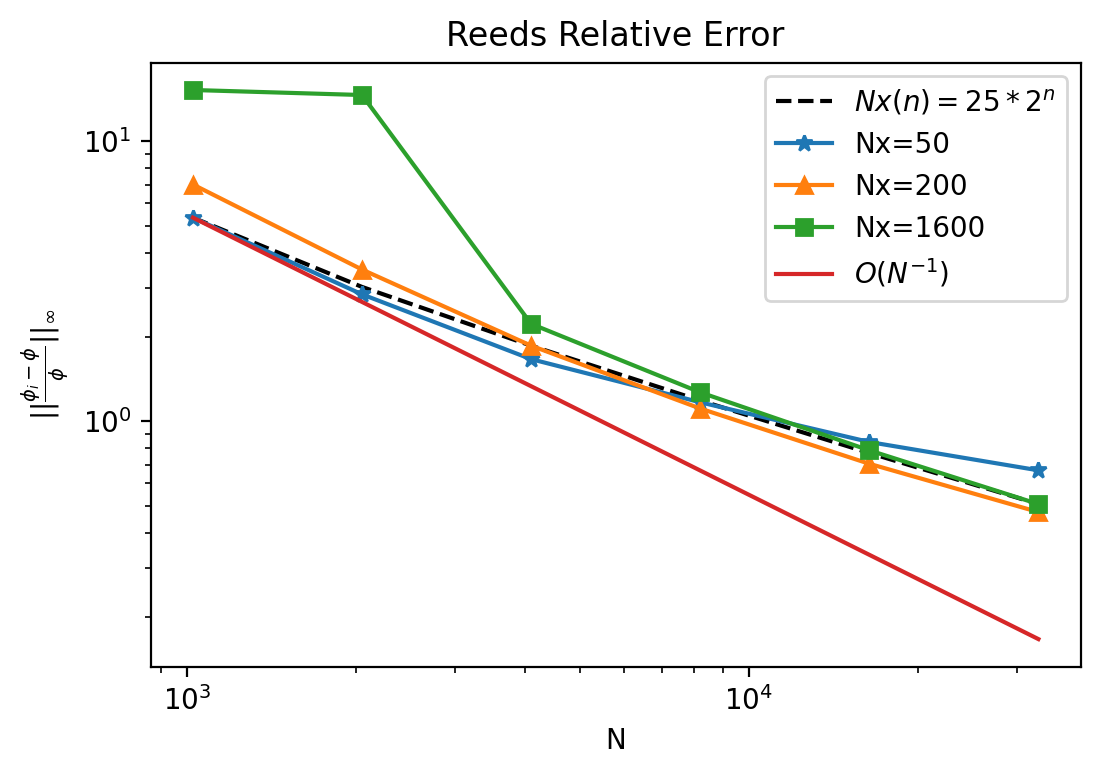

In [12]:
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
#O = diagonal[0]*np.sqrt(Nvals[0])/np.sqrt(Nvals)
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.figure(dpi=200)
ylabel = r'$||\frac{\phi_i - \phi}{\phi}||_\infty$'

plt.title("Reeds Relative Error")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label=r'$Nx(n)=25*2^{n}$')
plt.plot(Nvals, Nx50, '*-',label=r'Nx=50')
plt.plot(Nvals, Nx200, '^-',label=r'Nx=200')
plt.plot(Nvals, Nx1600, 's-',label=r'Nx=1600')
plt.plot(Nvals, O, label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.legend()